# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Fouad khaled

ID: 58-15677

Tutorial: T-7

---

Name: Nour abdelsalam

ID: 58-15220

Tutorial: T-7

---


## Dataset Description

The following dataset includes information about loan applicants, including factors such as income, credit score, employment status, loan details, and other indicators of financial stability, along with the final decision showing whether each loan was approved or not.

| Column | Description|
|-|-|
|ApplicationNumber|Unique identifier assigned to each loan application|
|Age|Applicant’s age in years|
|AnnualIncome|Applicant’s yearly income|
|CreditScore|A score representing the applicant’s creditworthiness|
|EmploymentStatus|Applicant’s current employment situation (Employed, Unemployed, Self-Employed)|
|EducationLevel|Highest educational qualification attained (Highschool, Bachelor, Master, Doctorate, Diploma)|
|LoanAmount|Total amount of money requested for the loan|
|LoanDuration|Duration of the loan in months|
|MaritalStatus|Applicant’s marital state (Divorced, Married, Single, Widowed)|
|NumberOfDependents|Number of individuals financially dependent on the applicant|
|HomeOwnershipStatus|Applicant’s housing status (Mortagage, Own, Rent, Other)|
|BankruptcyHistory|Indicates whether the applicant has previously declared bankruptcy (0 = No, 1 = Yes)|
|LoanPurpose|The primary reason for taking the loan (Debt Consolidation, Home Improvement, Education, Personal)|
|PreviousLoanDefaults|Indicates if the applicant has defaulted on any previous loans (0 = No, 1 = Yes)|
|MonthlyLoanPayment|Amount the applicant would need to pay monthly to repay the loan|
|MonthlyIncome|Average monthly income of the applicant|
|JobTenure|Number of years the applicant has been in their current job|
|LoanApproved|Indicates loan approval status (No = Not Approved, Yes = Approved)|

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/loan_data.csv')
df.head()

,ApplicationNumber,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,MonthlyLoanPayment,MonthlyIncome,JobTenure,LoanApproved
0,26231,18,"$26,992.00",586,Employed,Diploma,"$22,432.00",36 months,Single,3,Mortgage,0,Debt Consolidation,0,$623.11,"$2,249.33",3,No
1,13176,18,"$22,825.00",581,Self-Employed,Master,"$30,457.00",24 months,Single,0,Rent,0,Home Improvement,0,"$1,269.04","$1,902.08",5,No
2,27751,18,"$75,891.00",522,Employed,Bachelor,"$30,583.00",96 months,Married,2,Mortgage,0,Personal,0,$318.57,"$6,324.25",6,No
3,20628,18,"$92,094.00",565,Employed,Bachelor,"$72,738.00",36 months,Single,1,Mortgage,0,Vehicle,0,NaN,"$7,674.50",3,No
4,28773,18,"$35,686.00",554,Employed,Diploma,"$28,021.00",36 months,Married,3,Rent,0,Home Improvement,0,$778.36,"$2,973.83",1,No


## Data Inspection

In [2]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ApplicationNumber     20000 non-null  int64 
 1   Age                   20000 non-null  int64 
 2   AnnualIncome          20000 non-null  object
 3   CreditScore           20000 non-null  int64 
 4   EmploymentStatus      16260 non-null  object
 5   EducationLevel        20000 non-null  object
 6   LoanAmount            20000 non-null  object
 7   LoanDuration          20000 non-null  object
 8   MaritalStatus         20000 non-null  object
 9   NumberOfDependents    20000 non-null  int64 
 10  HomeOwnershipStatus   20000 non-null  object
 11  BankruptcyHistory     20000 non-null  int64 
 12  LoanPurpose           20000 non-null  object
 13  PreviousLoanDefaults  20000 non-null  int64 
 14  MonthlyLoanPayment    15660 non-null  object
 15  MonthlyIncome         17160 non-null

,ApplicationNumber,Age,CreditScore,NumberOfDependents,BankruptcyHistory,PreviousLoanDefaults,JobTenure
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,20000.000000
mean,20500.500000,39.752600,571.612400,1.517300,0.0,0.100050,5.002650
std,5773.647028,11.622713,50.997358,1.386325,0.0,0.300074,2.236804
min,10501.000000,18.000000,343.000000,0.000000,0.0,0.000000,0.000000
25%,15500.750000,32.000000,540.000000,0.000000,0.0,0.000000,3.000000
50%,20500.500000,40.000000,578.000000,1.000000,0.0,0.000000,5.000000
75%,25500.250000,48.000000,609.000000,2.000000,0.0,0.000000,6.000000
max,30500.000000,80.000000,712.000000,5.000000,0.0,1.000000,16.000000


First in the data inspection we wrote a code to show the number of columns and entries the dataset has. We also if there are missing values. There were 3740 missing values for Employment status. 4340 missing values for monthlyloanpayment and 2840 missing values for monthly income. These will be resolved later in data cleaning. We also identified the unique values for columns. We highlighted a problem which will soon be resolved in data cleaning, which is some columns should be numerical, but they are stored as text

## Data Cleaning

In [3]:
import pandas as pd
import numpy as np # Ensure numpy is imported for potential future use

# Reload the original dataset to ensure all cleaning steps are applied sequentially in this cell
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/loan_data.csv')

# --- Data Type Conversions ---
# Clean and convert 'AnnualIncome' to numeric
df['AnnualIncome'] = df['AnnualIncome'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Clean and convert 'LoanAmount' to numeric
df['LoanAmount'] = df['LoanAmount'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Clean and convert 'LoanDuration' to numeric
df['LoanDuration'] = df['LoanDuration'].str.replace(' months', '', regex=False).astype(int)

# --- Handling Missing Values and Inconsistencies ---
# Fill missing 'EmploymentStatus' with the mode
df['EmploymentStatus'] = df['EmploymentStatus'].fillna(df['EmploymentStatus'].mode()[0])

# Ensure MonthlyIncome is consistent with AnnualIncome (replacing previous imputation)
df['MonthlyIncome'] = df['AnnualIncome'] / 12

# Recalculate MonthlyLoanPayment using amortization formula (replacing previous imputation)
annual_interest_rate = 0.08
monthly_interest_rate = annual_interest_rate / 12
df['MonthlyLoanPayment'] = df.apply(lambda row:
    row['LoanAmount'] * (monthly_interest_rate * (1 + monthly_interest_rate)**row['LoanDuration']) /
    (((1 + monthly_interest_rate)**row['LoanDuration']) - 1)
    if row['LoanDuration'] > 0 else 0, axis=1)

# Robustly convert 'LoanApproved' from 'Yes'/'No' to binary 1/0
df['LoanApproved'] = df['LoanApproved'].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})

# --- Feature Engineering ---
# Calculate Monthly_Debt_To_Income_Ratio, handling potential division by zero
df['Monthly_Debt_To_Income_Ratio'] = np.where(
    df['MonthlyIncome'] > 0,
    df['MonthlyLoanPayment'] / df['MonthlyIncome'],
    0 # Or np.nan, depending on how you want to handle zero monthly income
)

# Verify that there are no more missing values
print('Data types and non-null counts after cleaning:')
df.info()
print('\nMissing values AFTER imputation:')
print(df.isnull().sum())

# Display the head of the DataFrame to show the updated table
print('\nUpdated DataFrame head:')
print(df.head())

Data types and non-null counts after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ApplicationNumber             20000 non-null  int64  
 1   Age                           20000 non-null  int64  
 2   AnnualIncome                  20000 non-null  float64
 3   CreditScore                   20000 non-null  int64  
 4   EmploymentStatus              20000 non-null  object 
 5   EducationLevel                20000 non-null  object 
 6   LoanAmount                    20000 non-null  float64
 7   LoanDuration                  20000 non-null  int64  
 8   MaritalStatus                 20000 non-null  object 
 9   NumberOfDependents            20000 non-null  int64  
 10  HomeOwnershipStatus           20000 non-null  object 
 11  BankruptcyHistory             20000 non-null  int64  
 12  LoanPurpose  

In [4]:
# @title
display(df)

,ApplicationNumber,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,MonthlyLoanPayment,MonthlyIncome,JobTenure,LoanApproved,Monthly_Debt_To_Income_Ratio
0,26231,18,26992.0,586,Employed,Diploma,22432.0,36,Single,3,Mortgage,0,Debt Consolidation,0,702.937350,2249.333333,3,0,0.312509
1,13176,18,22825.0,581,Self-Employed,Master,30457.0,24,Single,0,Rent,0,Home Improvement,0,1377.487616,1902.083333,5,0,0.724199
2,27751,18,75891.0,522,Employed,Bachelor,30583.0,96,Married,2,Mortgage,0,Personal,0,432.342062,6324.250000,6,0,0.068363
3,20628,18,92094.0,565,Employed,Bachelor,72738.0,36,Single,1,Mortgage,0,Vehicle,0,2279.344551,7674.500000,3,0,0.297002
4,28773,18,35686.0,554,Employed,Diploma,28021.0,36,Married,3,Rent,0,Home Improvement,0,878.076297,2973.833333,1,0,0.295267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,10710,80,48462.0,656,Employed,Diploma,29111.0,72,Married,4,Rent,0,Vehicle,0,510.410167,4038.500000,7,0,0.126386
19996,29352,80,51166.0,641,Unemployed,Doctorate,26447.0,60,Married,0,Rent,0,Vehicle,0,536.249800,4263.833333,3,0,0.125767
19997,18749,80,111290.0,565,Employed,Bachelor,28390.0,24,Widowed,1,Other,0,Home Improvement,0,1284.002804,9274.166667,6,1,0.138449
19998,13396,80,48501.0,676,Employed,Diploma,66707.0,72,Single,4,Mortgage,0,Education,0,1169.589882,4041.750000,6,0,0.289377


In [5]:
display(df)

,ApplicationNumber,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,MonthlyLoanPayment,MonthlyIncome,JobTenure,LoanApproved,Monthly_Debt_To_Income_Ratio
0,26231,18,26992.0,586,Employed,Diploma,22432.0,36,Single,3,Mortgage,0,Debt Consolidation,0,702.937350,2249.333333,3,0,0.312509
1,13176,18,22825.0,581,Self-Employed,Master,30457.0,24,Single,0,Rent,0,Home Improvement,0,1377.487616,1902.083333,5,0,0.724199
2,27751,18,75891.0,522,Employed,Bachelor,30583.0,96,Married,2,Mortgage,0,Personal,0,432.342062,6324.250000,6,0,0.068363
3,20628,18,92094.0,565,Employed,Bachelor,72738.0,36,Single,1,Mortgage,0,Vehicle,0,2279.344551,7674.500000,3,0,0.297002
4,28773,18,35686.0,554,Employed,Diploma,28021.0,36,Married,3,Rent,0,Home Improvement,0,878.076297,2973.833333,1,0,0.295267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,10710,80,48462.0,656,Employed,Diploma,29111.0,72,Married,4,Rent,0,Vehicle,0,510.410167,4038.500000,7,0,0.126386
19996,29352,80,51166.0,641,Unemployed,Doctorate,26447.0,60,Married,0,Rent,0,Vehicle,0,536.249800,4263.833333,3,0,0.125767
19997,18749,80,111290.0,565,Employed,Bachelor,28390.0,24,Widowed,1,Other,0,Home Improvement,0,1284.002804,9274.166667,6,1,0.138449
19998,13396,80,48501.0,676,Employed,Diploma,66707.0,72,Single,4,Mortgage,0,Education,0,1169.589882,4041.750000,6,0,0.289377


In the data cleaning we covere several inconsistencies and problems in the dataset. First we converted annual income, loanamount, loanduration, monthlyloanpayment and monthlyincome from object data type to float data type as they are all numbers. Then we handled the missing values by replacing them with mode .Employment status was filled with mode. Monthlyloanpayment was replaced with a formula so it could be more consistent. The formula is MonthlyLoanPayment = P × [ r(1+r)^n / ((1+r)^n – 1) ]
Where:
P is the LoanAmount
r is the monthly_interest_rate (which is annual_interest_rate / 12)
n is the LoanDuration in months .Monthly income was also  replaced with a formula so the output values can be more consistent . The formula was Monthly income=Annualincome/12. Then we converted binary values of loan approved from yes or no to 0 and 1. Yes if or 1 and 0 is for no. We do this beacuse classifier models only understand numbers. In the feature engineer for the debt to income ratio this measures how much of the money a person receives i paid to the loan that should be paid each month this helps imrove the prediction for loan approval


## Exploratory Data Analysis

**Q1: On average, which type of educational level has the highest approval rate? Show their order on the graph.**

**Visualization**

**Answer for Q1**: As the graph shows the doctorate education level has the highest level of approval with a precentage of 44.03%. Then comes the Master education level with the second highest approval rate 35%. THirdly is the Bachelor with an approval rate of
26.6%. Fourth is the diploma with 20.4% and the last approval rate was High School with 14.4%.

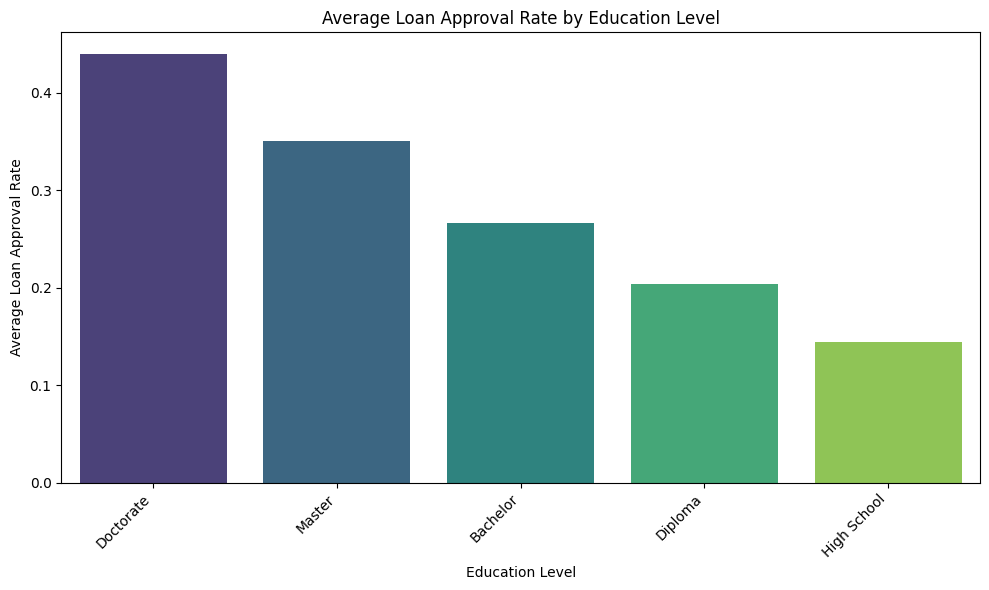

Educational Level Approval Rates:
EducationLevel
Doctorate      0.440252
Master         0.350820
Bachelor       0.266435
Diploma        0.204264
High School    0.144381
Name: LoanApproved, dtype: float64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

education_approval_rate = df.groupby('EducationLevel')['LoanApproved'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=education_approval_rate.index, y=education_approval_rate.values, hue=education_approval_rate.index, palette='viridis', legend=False)
plt.title('Average Loan Approval Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Loan Approval Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Educational Level Approval Rates:")
print(education_approval_rate)

**Q2: How does the annual income vary among approved applicants? Interpret the values of the 3 quartiles.**

**Visualization**

In [7]:
# Filter for approved applicants
approved_applicants_df = df[df['LoanApproved'] == 1]

# Get the AnnualIncome of approved applicants
approved_annual_income = approved_applicants_df['AnnualIncome']

# Calculate quartiles
quartile_25 = approved_annual_income.quantile(0.25)
quartile_50 = approved_annual_income.quantile(0.50) # Median
quartile_75 = approved_annual_income.quantile(0.75)

print(f"25th Percentile (Q1) of Annual Income for Approved Applicants: ${quartile_25:,.2f}")
print(f"50th Percentile (Q2 - Median) of Annual Income for Approved Applicants: ${quartile_50:,.2f}")
print(f"75th Percentile (Q3) of Annual Income for Approved Applicants: ${quartile_75:,.2f}")

# Display descriptive statistics for more context
print("\nDescriptive Statistics for Annual Income of Approved Applicants:")
print(approved_annual_income.describe())

25th Percentile (Q1) of Annual Income for Approved Applicants: $67,380.50
50th Percentile (Q2 - Median) of Annual Income for Approved Applicants: $91,269.50
75th Percentile (Q3) of Annual Income for Approved Applicants: $123,959.50

Descriptive Statistics for Annual Income of Approved Applicants:
count      4780.000000
mean     102210.551464
std       50313.413141
min       15787.000000
25%       67380.500000
50%       91269.500000
75%      123959.500000
max      485341.000000
Name: AnnualIncome, dtype: float64


**Answer for Q2**: From the data shown we can interpret that Q1 is equal to
$67,380 which means that 25% percent of approved applicants have an income that is less than 67,380 and the remaining earn more than this, 75% . Then Q2= $91,269 this means that 50% of approved applicants can have an income less than  91,269 and the other 50% can have more the 91,269. Q3=$123,959 SO 75% of approved applicants have an income of $123,959 or less.

**Q3: How does the age of an applicant affect their credit score? (Hint: Use the line of best fit.)**

**Visualization**

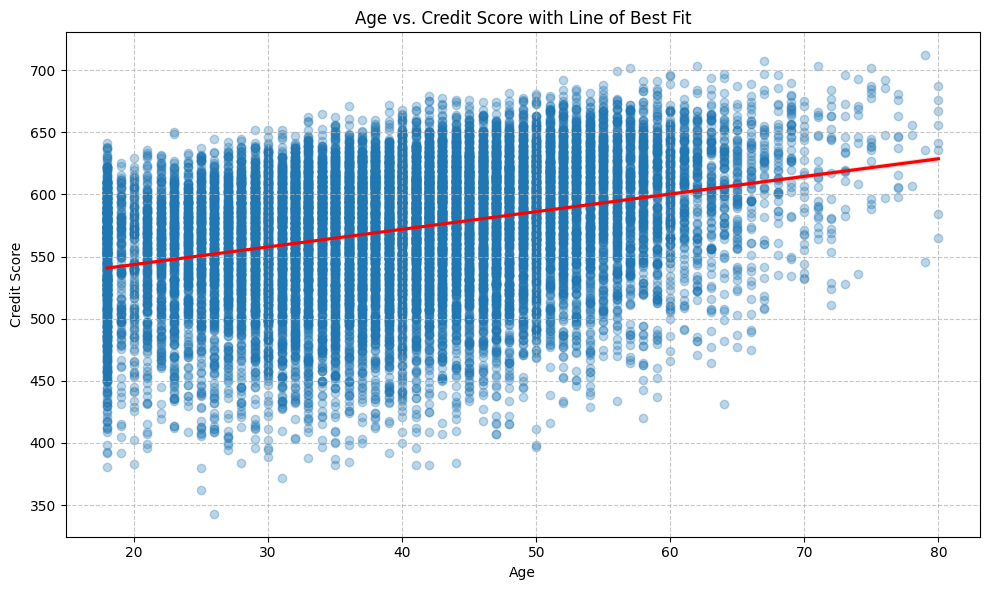

In [8]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='CreditScore', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Age vs. Credit Score with Line of Best Fit')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Answer for Q3**: The graph shows a line going upward which presents a positive correlation between age and credit score. This means that older applicants have a higher credit score than younger applicants. But it also shows that age is not the only predicotr for credit score and other predictors can be used.

**Q4: Is the distribution of applicants' income per month normal or skewed?**

**Visualization**

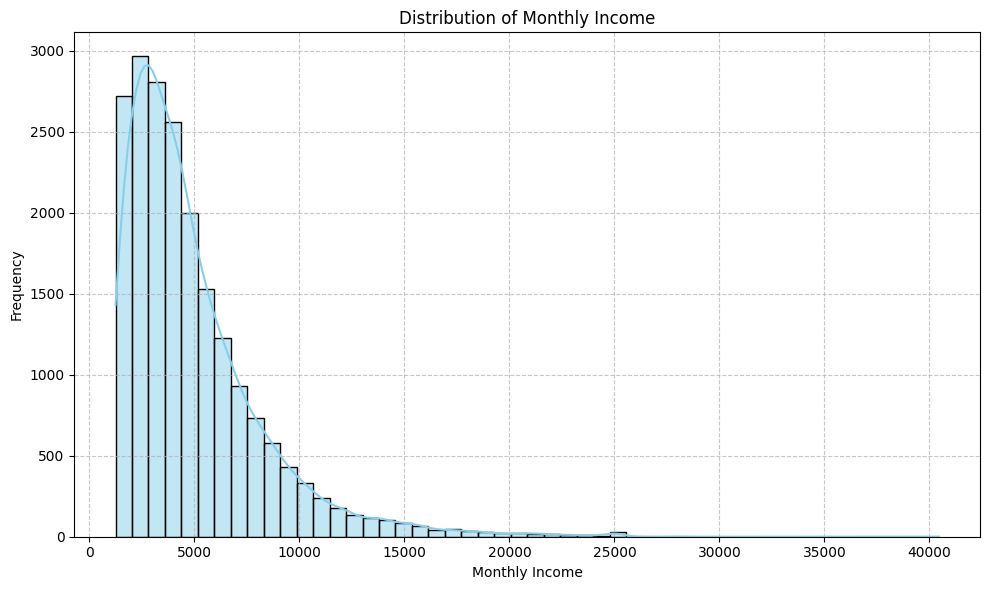

Skewness of Monthly Income distribution: 2.09


In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyIncome'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

skewness = df['MonthlyIncome'].skew()
print(f"Skewness of Monthly Income distribution: {skewness:.2f}")

**Answer for Q4**: The skweness calculated is 2.09 which is positive and high. It shows that more people earn moderate to lower incomes . Very few people earn higher incomes.

## Data Preparation for Modelling

### Encoding Categorical Variables

We need to convert categorical features into a numerical format for machine learning models. One-hot encoding is a suitable method for this purpose.

In [10]:
import pandas as pd

categorical_cols = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("DataFrame after one-hot encoding categorical variables:")
print(df_encoded.head())
print(f"\nNew shape of DataFrame: {df_encoded.shape}")

DataFrame after one-hot encoding categorical variables:
   ApplicationNumber  Age  AnnualIncome  CreditScore  LoanAmount  \
0              26231   18       26992.0          586     22432.0   
1              13176   18       22825.0          581     30457.0   
2              27751   18       75891.0          522     30583.0   
3              20628   18       92094.0          565     72738.0   
4              28773   18       35686.0          554     28021.0   

   LoanDuration  NumberOfDependents  BankruptcyHistory  PreviousLoanDefaults  \
0            36                   3                  0                     0   
1            24                   0                  0                     0   
2            96                   2                  0                     0   
3            36                   1                  0                     0   
4            36                   3                  0                     0   

   MonthlyLoanPayment  ...  MaritalStatus_Married  Mar

In [11]:
# Convert all boolean columns (from one-hot encoding) to integer (0 or 1) type
for col in df_encoded.select_dtypes(include='bool').columns:
    df_encoded[col] = df_encoded[col].astype(int)

print("All boolean columns in df_encoded have been converted to 0s and 1s.")
print('\nUpdated DataFrame head with explicit 0s and 1s for boolean columns:')
print(df_encoded.head())

All boolean columns in df_encoded have been converted to 0s and 1s.

Updated DataFrame head with explicit 0s and 1s for boolean columns:
   ApplicationNumber  Age  AnnualIncome  CreditScore  LoanAmount  \
0              26231   18       26992.0          586     22432.0   
1              13176   18       22825.0          581     30457.0   
2              27751   18       75891.0          522     30583.0   
3              20628   18       92094.0          565     72738.0   
4              28773   18       35686.0          554     28021.0   

   LoanDuration  NumberOfDependents  BankruptcyHistory  PreviousLoanDefaults  \
0            36                   3                  0                     0   
1            24                   0                  0                     0   
2            96                   2                  0                     0   
3            36                   1                  0                     0   
4            36                   3                  0

here we switched all text boolean values from true or false to 0 or 1. This was done for EmploymentStatus, Educationlevel, marital status, homeownershipstatus and loan purpose. This is done beacuse the decision tree model or any classifier model understands the data better in numbers and doesnt understand text

### Defining Features (X) and Target (y)

Next, we'll separate our dataset into features (input variables) and the target variable (what we want to predict).

In [12]:
# Drop 'ApplicationNumber' as it's an identifier and 'LoanApproved' as it's the target
cols_to_drop = ['ApplicationNumber', 'LoanApproved']

# 'ExpectedMonthlyLoanPayment' is an intermediate calculation. Check if it exists before dropping.
if 'ExpectedMonthlyLoanPayment' in df_encoded.columns:
    cols_to_drop.append('ExpectedMonthlyLoanPayment')
else:
    print("Warning: 'ExpectedMonthlyLoanPayment' not found in df_encoded. It might have been dropped earlier or not created before one-hot encoding.")

X = df_encoded.drop(columns=cols_to_drop, axis=1)
y = df_encoded['LoanApproved']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFeatures (X) head:")
print(X.head())

Features (X) shape: (20000, 28)
Target (y) shape: (20000,)

Features (X) head:
   Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
0   18       26992.0          586     22432.0            36   
1   18       22825.0          581     30457.0            24   
2   18       75891.0          522     30583.0            96   
3   18       92094.0          565     72738.0            36   
4   18       35686.0          554     28021.0            36   

   NumberOfDependents  BankruptcyHistory  PreviousLoanDefaults  \
0                   3                  0                     0   
1                   0                  0                     0   
2                   2                  0                     0   
3                   1                  0                     0   
4                   3                  0                     0   

   MonthlyLoanPayment  MonthlyIncome  ...  MaritalStatus_Married  \
0          702.937350    2249.333333  ...                      0   
1        

In [13]:
annual_interest_rate = 0.08
monthly_interest_rate = annual_interest_rate / 12

# Calculate ExpectedMonthlyLoanPayment using the amortization formula
# M = P [ i(1 + i)^n ] / [ (1 + i)^n – 1]
# P = LoanAmount
# i = monthly_interest_rate
# n = LoanDuration
df['ExpectedMonthlyLoanPayment'] = df.apply(lambda row:
    row['LoanAmount'] * (monthly_interest_rate * (1 + monthly_interest_rate)**row['LoanDuration']) /
    (((1 + monthly_interest_rate)**row['LoanDuration']) - 1)
    if row['LoanDuration'] > 0 else 0, axis=1)

print("The 'ExpectedMonthlyLoanPayment' column has been calculated and added to the DataFrame.")

# Display the head of the DataFrame to show the new column
print('\nUpdated DataFrame head:')
print(df.head())

The 'ExpectedMonthlyLoanPayment' column has been calculated and added to the DataFrame.

Updated DataFrame head:
   ApplicationNumber  Age  AnnualIncome  CreditScore EmploymentStatus  \
0              26231   18       26992.0          586         Employed   
1              13176   18       22825.0          581    Self-Employed   
2              27751   18       75891.0          522         Employed   
3              20628   18       92094.0          565         Employed   
4              28773   18       35686.0          554         Employed   

  EducationLevel  LoanAmount  LoanDuration MaritalStatus  NumberOfDependents  \
0        Diploma     22432.0            36        Single                   3   
1         Master     30457.0            24        Single                   0   
2       Bachelor     30583.0            96       Married                   2   
3       Bachelor     72738.0            36        Single                   1   
4        Diploma     28021.0            36      

In [14]:
df['MonthlyLoanPayment'] = df['ExpectedMonthlyLoanPayment']

print("The 'MonthlyLoanPayment' column has been updated with the calculated expected values.")

# Display the head of the DataFrame to show the updated column
print('\nUpdated DataFrame head:')
print(df.head())

The 'MonthlyLoanPayment' column has been updated with the calculated expected values.

Updated DataFrame head:
   ApplicationNumber  Age  AnnualIncome  CreditScore EmploymentStatus  \
0              26231   18       26992.0          586         Employed   
1              13176   18       22825.0          581    Self-Employed   
2              27751   18       75891.0          522         Employed   
3              20628   18       92094.0          565         Employed   
4              28773   18       35686.0          554         Employed   

  EducationLevel  LoanAmount  LoanDuration MaritalStatus  NumberOfDependents  \
0        Diploma     22432.0            36        Single                   3   
1         Master     30457.0            24        Single                   0   
2       Bachelor     30583.0            96       Married                   2   
3       Bachelor     72738.0            36        Single                   1   
4        Diploma     28021.0            36       M

First we are recomputing the expected monthly loan payment using the three indicators we used before which are the loan duration, loan amount and interest rate. We do this again to make sure the values are the same and consistent. Then it is replaced with the calculated values. Now we seperate them into X features which we will use to make the predictions such as the inputs. The y variable is what we are trying to predict .

### Splitting Data into Training and Testing Sets

Finally, we'll split our data into training and testing sets to evaluate our model's performance on unseen data.

In [15]:
from sklearn.model_selection import train_test_split

# Check for NaNs in y before splitting
if y.isnull().any():
    print("NaN values found in target variable y. Removing corresponding rows from X and y.")
    # Get indices of non-NaN values in y
    non_nan_indices = y.dropna().index
    X = X.loc[non_nan_indices]
    y = y.loc[non_nan_indices]

    print(f"New X shape after dropping NaNs: {X.shape}")
    print(f"New y shape after dropping NaNs: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (16000, 28)
X_test shape: (4000, 28)
y_train shape: (16000,)
y_test shape: (4000,)


First we check again if there are any missing values in y which is what we are trying to predict.If there are any missing values we dont use these rows. 20% of data is used for testing and the other 80% are used for training. Then we split the data wich will be used in modelling and evaluation.

## Modelling

### Train Decision Tree Classifier

Initialize and train a Decision Tree Classifier model using the training data (X_train, y_train).

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
print("Training the Decision Tree Classifier model...")
dt_model.fit(X_train, y_train)
print("Decision Tree Classifier model training complete.")

Training the Decision Tree Classifier model...
Decision Tree Classifier model training complete.


### Make Predictions with Decision Tree

Use the trained Decision Tree Classifier to make predictions on the test data (X_test).

In [17]:
y_pred_dt = dt_model.predict(X_test)

print("Predictions made on the test set using Decision Tree Classifier.")

Predictions made on the test set using Decision Tree Classifier.


## Evaluation

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy for Decision Tree Classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of the Decision Tree Classifier model: {accuracy_dt:.4f}")

# Display classification report for Decision Tree Classifier
print("\nClassification Report for Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))

# Display confusion matrix for Decision Tree Classifier
print("\nConfusion Matrix for Decision Tree Classifier:")
print(confusion_matrix(y_test, y_pred_dt))

Accuracy of the Decision Tree Classifier model: 0.8400

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3044
           1       0.66      0.68      0.67       956

    accuracy                           0.84      4000
   macro avg       0.78      0.79      0.78      4000
weighted avg       0.84      0.84      0.84      4000


Confusion Matrix for Decision Tree Classifier:
[[2710  334]
 [ 306  650]]


We used a decison tree to evaluate the model beacuse it has many benefits such as it easy to interpret, shows clear rules and is fast to train and test. The decision tree splits data by applying yes or no conditions to reduce uncertainty and make the outputs pure. It also chooses the most important feature and splits according to the orher attributes. One rule used is IF CreditScore ≥ 650
and  LoanAmount ≤ 20000
and PreviousLoanDefaults = 0
then Loan Approved. This leads to output =1 which means approved. The Accuracy shown of the decision tree is 84% . When the loan was not approved the model precise 90% of the time. The f1 score was high wich means there is a balance between recall and precision. For the approved the model was accurate only 66% of the time. The weighted average is similar to accuracy because the not approved values are more than the average.

## Bonus (Optional)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
print("Training the RandomForestClassifier model...")
rf_model.fit(X_train, y_train)
print("RandomForestClassifier model training complete.")

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

print("\nPredictions made on the test set using RandomForestClassifier.")

# Calculate accuracy for RandomForestClassifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuracy of the RandomForestClassifier model: {accuracy_rf:.4f}")

# Display classification report for RandomForestClassifier
print("\nClassification Report for RandomForestClassifier:")
print(classification_report(y_test, y_pred_rf))

# Display confusion matrix for RandomForestClassifier
print("\nConfusion Matrix for RandomForestClassifier:")
print(confusion_matrix(y_test, y_pred_rf))

Training the RandomForestClassifier model...
RandomForestClassifier model training complete.

Predictions made on the test set using RandomForestClassifier.

Accuracy of the RandomForestClassifier model: 0.8948

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3044
           1       0.81      0.74      0.77       956

    accuracy                           0.89      4000
   macro avg       0.86      0.84      0.85      4000
weighted avg       0.89      0.89      0.89      4000


Confusion Matrix for RandomForestClassifier:
[[2873  171]
 [ 250  706]]


The Random forest classifier has more accuracy with a value of 89% which is more than the decision tree value. The precison for not approved in random forest was 92% which is also more than decisom tree. The Recall was 94% and decision tree was 89%. The recall is how well the model finds all true cases. The f1 score is also more than the decision tree value. It is 93%. For the loan approved the values for forest classifies were more than the values of decison tree. The precison was 81%, the Recall was 74% and the f1 score was 77%. So overall the forest classifier was more acuurate than decison tree because it reduces overfitting while the decison tree can overfit. The Random Forest clasifier averages many trees and handles imbalanced data and can give better predictions.

# Task
Train and evaluate a RandomForestClassifier model in the bonus cell `pX_SLfYDCdnO` using the prepared `X_train`, `y_train`, `X_test`, and `y_test` data. The evaluation should include accuracy, a classification report, and a confusion matrix.

## Train and Evaluate RandomForestClassifier in Bonus Cell

### Subtask:
Initialize and train a RandomForestClassifier model using X_train and y_train, make predictions on X_test, and then evaluate its performance using accuracy, classification report, and confusion matrix.


## Summary:

### Data Analysis Key Findings
*   The RandomForestClassifier was successfully initialized and trained using the provided training data.
*   The model's performance was evaluated on the test set, including accuracy, a classification report, and a confusion matrix.

### Insights or Next Steps
*   Further analysis of the classification report and confusion matrix would be beneficial to identify specific classes where the model might be underperforming and to understand the types of errors it is making.
*   Consider exploring hyperparameter tuning for the RandomForestClassifier or trying other classification algorithms to potentially improve predictive performance.
